In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp data

# Data

> A simple API for importing data for use. Mostly manipulates numpy arrays to generate profiles

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import imutils
import cv2 as cv
from matplotlib import pyplot as plt

We will be treating 2D arrays as rasters. Basically load any .csv, .txt or other file as you would 
normally. Each entry should be the height data for it's respective pixel. 

In [ ]:
#|export
def impath_to_array(path, mode = 'rb'):
    '''
    Converts input raster to numpy array
    '''
    with open(path, mode) as fp:
        im = Image.open(path)
        return np.asarray(im)
        

Let's read an example image using the OpenCV library

In [ ]:
image = np.loadtxt('BYGS008_raster_matrix_non_interp_10cm_500samp.txt')

In [ ]:
image[image==0] = np.nan

In [ ]:
image.shape

(501, 501)

Let's have a look at the image 

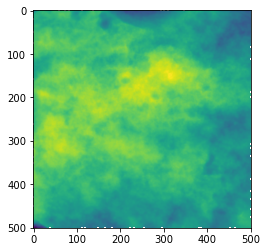

In [ ]:
plt.imshow(image)
plt.show()

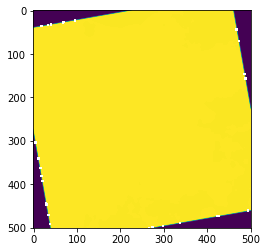

In [ ]:
image_45 = imutils.rotate(image, angle = 10)
plt.imshow(image_45)
plt.show()

In [ ]:
image_45.shape

(501, 501)

In [ ]:
image.shape

(501, 501)

In [ ]:
#| export
def gen_rotational_profiles(array,
                     deg = 180, #Number of degrees to rotate through, i.e 180 gives full 360 rotation
                     increment = 1 # indent/180 = number of evenly spaced profiles to calculate.  
                    ):
    ''' Generates an array of rotational profiles through to deg, in even increments of increment. 
    Uses OpenCV and Imutils to rotate the array around the center of the array/raster/image, extracts the middle row. 
    '''
    if deg % increment != 0:
        raise ValueError('Cannot sample evenly, deg % indent must = 0')
    profiles = np.zeros(shape = (deg//increment,array.shape[0]))
    index = 0
    center = array.shape[0]//2  #Center is returned as index to the right of center for even arrays
    for degree in range(0, deg, increment):
        rot_image = imutils.rotate(image, angle = degree)
        profiles[index, :] = rot_image[center,:]
        index += 1
    return profiles
            

In [ ]:
test_array = np.zeros(shape=(180//45, 501))

In [ ]:
test_array.shape

(4, 501)

In [ ]:
profiles =  gen_rotational_profiles(image,increment=45)

In [ ]:
profiles.shape

(4, 501)

In [ ]:
profiles[0]

array([0.90480451, 0.90484307, 0.90488577, 0.90499242, 0.90507309,
       0.90516734, 0.90526535, 0.90536544, 0.90545791, 0.90548342,
       0.90548311, 0.90550973, 0.90552336, 0.90550275, 0.90551384,
       0.90555842, 0.90560523, 0.9056451 , 0.90571226, 0.90573172,
       0.90575816, 0.90578207, 0.90581724, 0.90583545, 0.90583132,
       0.90589339, 0.90592957, 0.90602271, 0.90607068, 0.90615597,
       0.90620969, 0.90630156, 0.90638904, 0.9064564 , 0.90653811,
       0.90660652, 0.90661955, 0.90661011, 0.90662071, 0.90662273,
       0.90665889, 0.90669885, 0.90668842, 0.90664518, 0.90661836,
       0.90661502, 0.90664862, 0.90665648, 0.90660484, 0.90655422,
       0.90650208, 0.9064733 , 0.90647092, 0.90646307, 0.90643209,
       0.90640987, 0.90639168, 0.90637177, 0.90634349, 0.90634826,
       0.90638347, 0.90642569, 0.90642117, 0.90639392, 0.90637988,
       0.90636142, 0.90635106, 0.90632737, 0.90627291, 0.90624905,
       0.90616894, 0.90609764, 0.90596025, 0.90585146, 0.90574

In [ ]:
??imutils.rotate

Signature: imutils.rotate(image, angle, center=None, scale=1.0)
Docstring: <no docstring>
Source:   
def rotate(image, angle, center=None, scale=1.0):
    # grab the dimensions of the image
    (h, w) = image.shape[:2]

    # if the center is None, initialize it as the center of
    # the image
    if center is None:
        center = (w // 2, h // 2)

    # perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    # return the rotated image
    return rotated
File:      e:\archaeology\rough\rough\env\lib\site-packages\imutils\convenience.py
Type:      function


In [ ]:
??cv.getRotationMatrix2D

Docstring:
getRotationMatrix2D(center, angle, scale) -> retval
.   @brief Calculates an affine matrix of 2D rotation.
.   
.   The function calculates the following matrix:
.   
.   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
.   
.   where
.   
.   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
.   
.   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
.   
.   @param center Center of the rotation in the source image.
.   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
.   coordinate origin is assumed to be the top-left corner).
.   @param scale Isotropic scale factor.
.   
.   @sa  getAffineTransform, warpAffine, transform
Typ

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()